In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

/Users/miltonvolpato/Google Drive/Alura/Alura_ED_PythonOO/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


O Prophet é uma ferramenta desenvolvida pelo Facebook para fazer previsões em séries temporais, que são basicamente dados coletados ao longo do tempo, como os preços das ações. É famoso por ser fácil de usar e por funcionar bem mesmo com poucos dados ou com dados que possuem padrões irregulares, o que é comum no mercado de ações.

Vamos usar dados de ações da empresa Johnson & Johnson como exemplo.

Aqui, usamos um comando para baixar os dados. É como se estivéssemos pedindo à internet para nos dar os preços das ações da Johnson & Johnson desde 2020 até o final de 2023. Fácil, né?

In [3]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1006 non-null   datetime64[ns]
 1   Open       1006 non-null   float64       
 2   High       1006 non-null   float64       
 3   Low        1006 non-null   float64       
 4   Close      1006 non-null   float64       
 5   Adj Close  1006 non-null   float64       
 6   Volume     1006 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.1 KB


Agora, dividimos nossos dados em duas partes: uma para treinar nosso 'adivinho' digital, que é até julho de 2023, e outra para testar nossas previsões, que é o restante do ano.

In [4]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [6]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino.head()

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007


O próximo passo é preparar os dados para o nosso adivinho, o Prophet. É como se estivéssemos arrumando os dados para que ele entenda o que estamos perguntando.

Depois, criamos o modelo do Prophet. Aqui, estamos dizendo ao Prophet para considerar padrões semanais e anuais nos dados, mas não diários. E também adicionamos feriados dos EUA, já que eles podem influenciar o preço das ações.

In [7]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

10:01:37 - cmdstanpy - INFO - Chain [1] start processing
10:01:39 - cmdstanpy - INFO - Chain [1] done processing


Agora, a parte mágica! Pedimos ao Prophet para prever o futuro, até o final de 2023. E então, plotamos um gráfico para ver como nossa previsão se compara com os dados reais.

In [8]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

In [10]:
type(previsao)

pandas.core.frame.DataFrame

In [11]:
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.050211,144.858268,155.135043,146.050211,146.050211,0.0,0.0,0.0,0.0,...,0.213453,0.213453,0.213453,4.007440,4.007440,4.007440,0.0,0.0,0.0,150.271105
1,2020-01-03,146.025225,145.073142,155.518041,146.025225,146.025225,0.0,0.0,0.0,0.0,...,0.355558,0.355558,0.355558,3.817739,3.817739,3.817739,0.0,0.0,0.0,150.198522
2,2020-01-06,145.950266,144.287850,154.368248,145.950266,145.950266,0.0,0.0,0.0,0.0,...,-0.053278,-0.053278,-0.053278,3.205832,3.205832,3.205832,0.0,0.0,0.0,149.102820
3,2020-01-07,145.925280,143.391363,154.731256,145.925280,145.925280,0.0,0.0,0.0,0.0,...,0.115311,0.115311,0.115311,3.002059,3.002059,3.002059,0.0,0.0,0.0,149.042650
4,2020-01-08,145.900294,143.581332,154.118420,145.900294,145.900294,0.0,0.0,0.0,0.0,...,0.261595,0.261595,0.261595,2.805367,2.805367,2.805367,0.0,0.0,0.0,148.967256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.232304,142.544207,164.464305,140.055950,159.305222,0.0,0.0,0.0,0.0,...,0.213453,0.213453,0.213453,4.354578,4.354578,4.354578,0.0,0.0,0.0,153.800336
1045,2023-12-22,149.177896,143.239559,165.004629,139.879593,159.340995,0.0,0.0,0.0,0.0,...,0.355558,0.355558,0.355558,4.494675,4.494675,4.494675,0.0,0.0,0.0,154.028129
1046,2023-12-23,149.123489,141.795462,164.642270,139.710222,159.395326,0.0,0.0,0.0,0.0,...,-0.446319,-0.446319,-0.446319,4.604569,4.604569,4.604569,0.0,0.0,0.0,153.281739
1047,2023-12-24,149.069081,142.376624,164.174934,139.606634,159.450560,0.0,0.0,0.0,0.0,...,-0.446320,-0.446320,-0.446320,4.682689,4.682689,4.682689,0.0,0.0,0.0,153.305450


Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

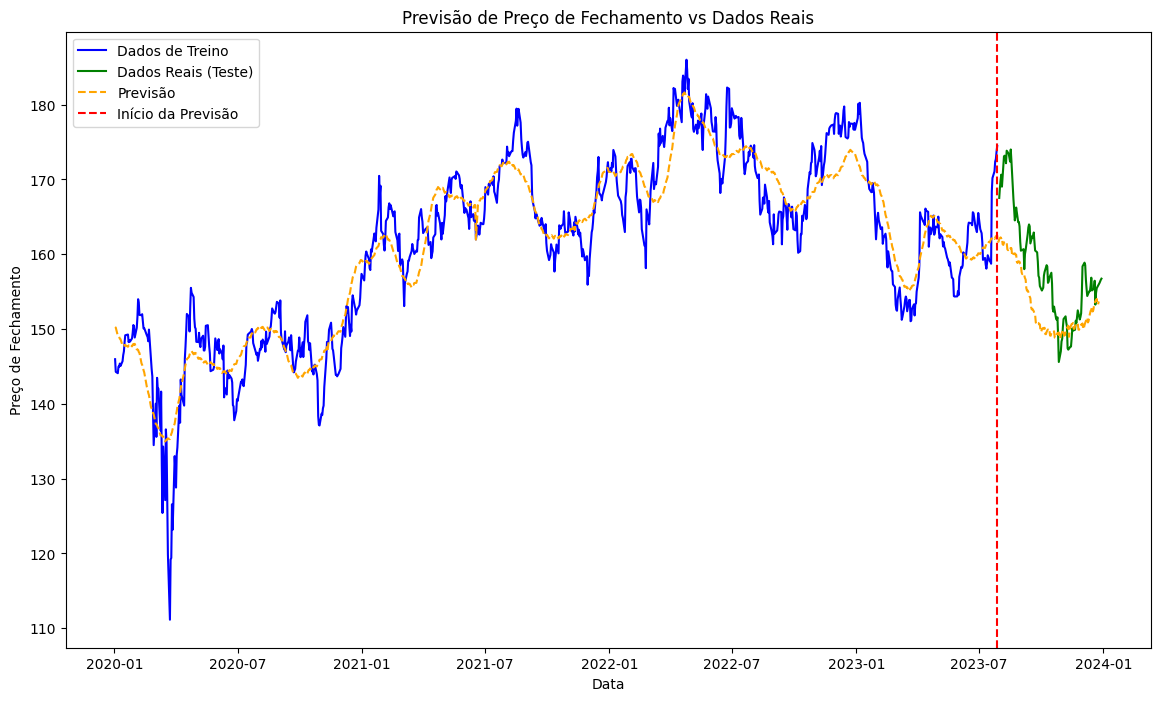

In [9]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()